In [30]:
# Import necessary libraries
import pandas as pd

# Load the datasets
customers = pd.read_csv("Customers.csv")   # Customers data
products = pd.read_csv("Products.csv")     # Products data
transactions = pd.read_csv("Transactions.csv")  # Transactions data

# Display the first few rows of each dataset to inspect the structure
print("Customers Data:")
print(customers.head(), "\n")

print("Products Data:")
print(products.head(), "\n")

print("Transactions Data:")
print(transactions.head(), "\n")


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C012

In [31]:
# Inspect Customers data
print("Customers Info:")
print(customers.info(), "\n")

# Inspect Products data
print("Products Info:")
print(products.info(), "\n")

# Inspect Transactions data
print("Transactions Info:")
print(transactions.info(), "\n")


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Nu

To handle missing data

In [32]:
# Check for missing values in each dataset
print("Missing Values in Customers Data:")
print(customers.isnull().sum(), "\n")

print("Missing Values in Products Data:")
print(products.isnull().sum(), "\n")

print("Missing Values in Transactions Data:")
print(transactions.isnull().sum(), "\n")

# Fill or drop missing values (example)
# Here we fill missing TotalValue in Transactions with 0 as an example
transactions['TotalValue'] = transactions['TotalValue'].fillna(0)


Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



To convert date columns into datetime format for consistency

In [33]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Verify the changes
print(customers['SignupDate'].head())
print(transactions['TransactionDate'].head())


0   2022-07-10
1   2022-02-13
2   2024-03-07
3   2022-10-09
4   2022-08-15
Name: SignupDate, dtype: datetime64[ns]
0   2024-08-25 12:38:23
1   2024-05-27 22:23:54
2   2024-04-25 07:38:55
3   2024-03-26 22:55:37
4   2024-03-21 15:10:10
Name: TransactionDate, dtype: datetime64[ns]


Remove Duplicates

In [34]:
# Remove duplicates from all datasets
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()


Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


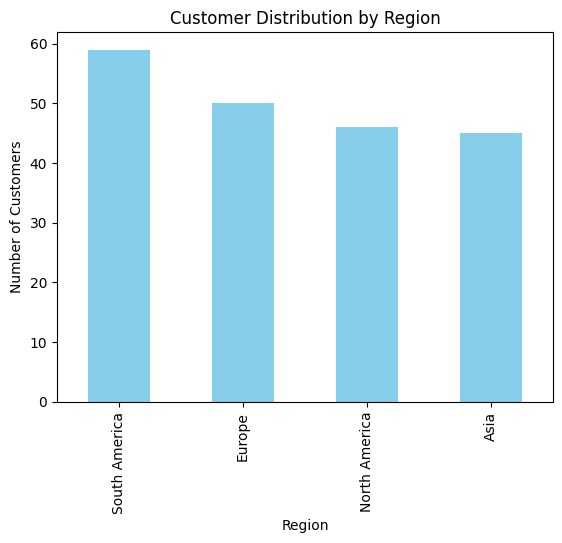

In [35]:
# Distribution of customers by region
region_counts = customers['Region'].value_counts()
print("Customer Distribution by Region:")
print(region_counts)

# Visualize the distribution (if you want to use Matplotlib or Seaborn)
import matplotlib.pyplot as plt

region_counts.plot(kind='bar', title="Customer Distribution by Region", color='skyblue')
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


In [36]:
# Top product categories
category_counts = products['Category'].value_counts()
print("Top Product Categories:")
print(category_counts)

# Most expensive products
top_expensive_products = products.sort_values('Price', ascending=False).head(10)
print("Top 10 Most Expensive Products:")
print(top_expensive_products)


Top Product Categories:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
Top 10 Most Expensive Products:
   ProductID               ProductName     Category   Price
74      P075          TechPro Textbook        Books  497.76
31      P032        BookWorld Cookbook        Books  488.63
44      P045         SoundWave T-Shirt     Clothing  481.78
16      P017       ActiveWear Textbook        Books  469.77
36      P037      SoundWave Smartwatch  Electronics  459.86
40      P041  ComfortLiving Smartphone  Electronics  456.28
82      P083     ActiveWear Smartwatch  Electronics  455.72
22      P023   ActiveWear Cookware Set   Home Decor  454.53
63      P064   HomeSense Running Shoes     Clothing  452.42
93      P094    HomeSense Cookware Set   Home Decor  447.34


In [37]:
# Total sales in the dataset
total_sales = transactions['TotalValue'].sum()
print(f"Total Sales: ${total_sales}")

# High-spending customers
high_spenders = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 High-Spending Customers:")
print(high_spenders)

Total Sales: $689995.56
Top 10 High-Spending Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [38]:
# Merge transactions with customers
transaction_details = pd.merge(transactions, customers, on='CustomerID')

# Merge with products
transaction_details = pd.merge(transaction_details, products, on='ProductID')

# Inspect the merged dataset
print(transaction_details.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

# Customer Insights

1. Analyze Signup Trends

Customer Signups by Year:
SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


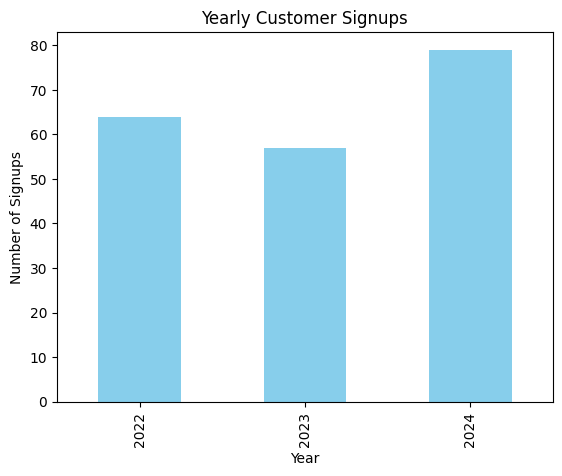

In [39]:
# Extract the year from the SignupDate
customers['SignupYear'] = customers['SignupDate'].dt.year

# Count the number of customers signing up each year
yearly_signups = customers['SignupYear'].value_counts().sort_index()

print("Customer Signups by Year:")
print(yearly_signups)

# Visualization
yearly_signups.plot(kind='bar', title="Yearly Customer Signups", color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


2. Analyze Regional Distribution

Customer Distribution by Region (%):
Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: proportion, dtype: float64


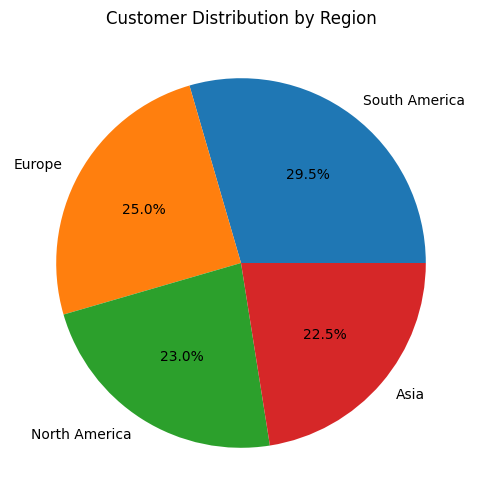

In [40]:
# Count customers by region
regional_distribution = customers['Region'].value_counts(normalize=True) * 100

print("Customer Distribution by Region (%):")
print(regional_distribution)

# Visualization
regional_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title="Customer Distribution by Region")
plt.ylabel("")  # Remove the y-axis label for aesthetics
plt.show()


# Product Insights

1. Find Top Product Categories

Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


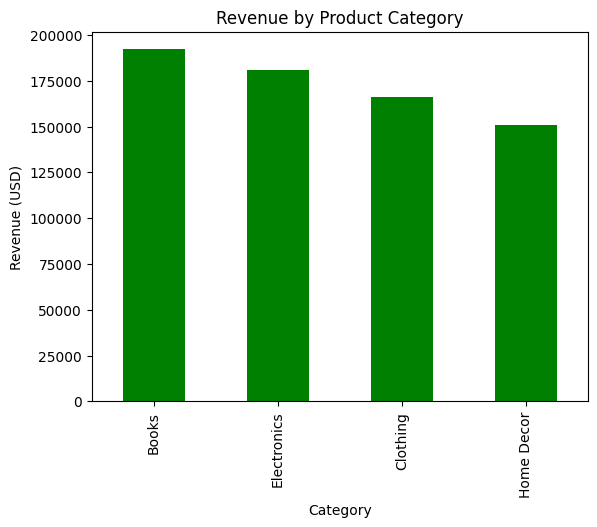

In [41]:
# Merge transactions with products to associate categories
transaction_details = pd.merge(transactions, products, on='ProductID')

# Calculate total revenue by category
category_revenue = transaction_details.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

print("Revenue by Product Category:")
print(category_revenue)

# Visualization
category_revenue.plot(kind='bar', title="Revenue by Product Category", color='green')
plt.xlabel("Category")
plt.ylabel("Revenue (USD)")
plt.show()


2. To find Most Profitable Products

Top 10 Revenue-Generating Products:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


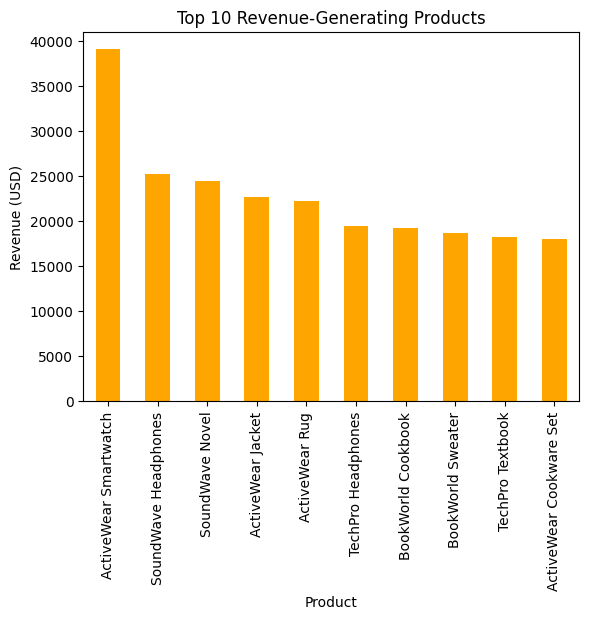

In [42]:
# Calculate revenue by product
product_revenue = transaction_details.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

print("Top 10 Revenue-Generating Products:")
print(product_revenue)

# Visualization
product_revenue.plot(kind='bar', title="Top 10 Revenue-Generating Products", color='orange')
plt.xlabel("Product")
plt.ylabel("Revenue (USD)")
plt.show()


# Transaction Insights

1. To find High-Value Customers

Top 10 High-Spending Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


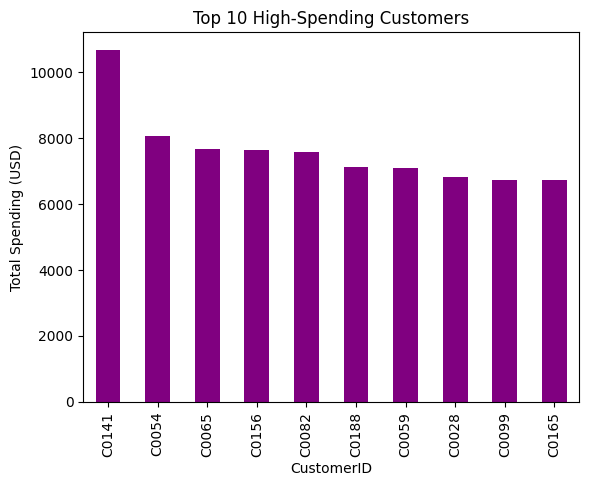

In [43]:
# Calculate total spending per customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

print("Top 10 High-Spending Customers:")
print(customer_spending)

# Visualization
customer_spending.plot(kind='bar', title="Top 10 High-Spending Customers", color='purple')
plt.xlabel("CustomerID")
plt.ylabel("Total Spending (USD)")
plt.show()


2. Analyze Transaction Trends Over Time

Monthly Revenue Trend:
YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


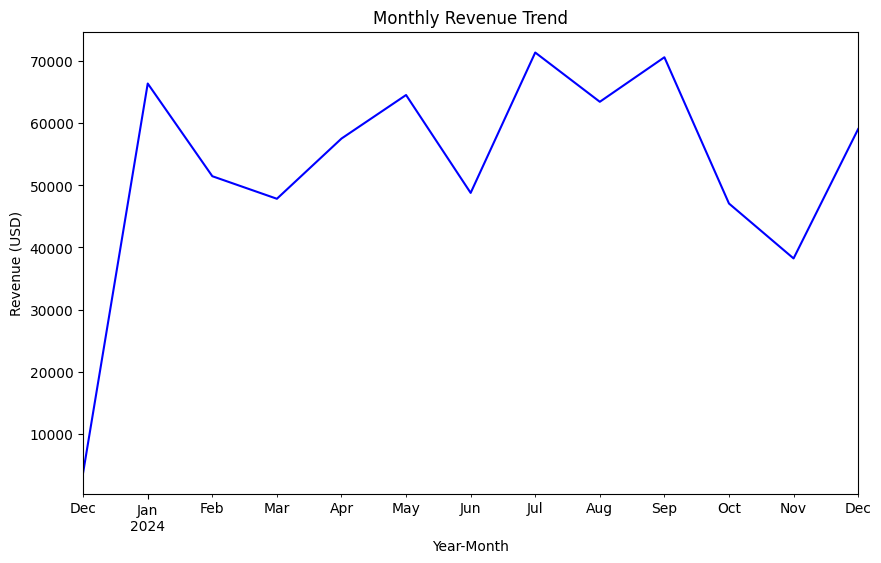

In [44]:
# Extract year and month from TransactionDate
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

# Calculate monthly revenue
monthly_revenue = transactions.groupby('YearMonth')['TotalValue'].sum()

print("Monthly Revenue Trend:")
print(monthly_revenue)

# Visualization
monthly_revenue.plot(kind='line', title="Monthly Revenue Trend", color='blue', figsize=(10, 6))
plt.xlabel("Year-Month")
plt.ylabel("Revenue (USD)")
plt.show()


Final Insights
After performing these analyses, your insights might look like this:

Customer Insight:

"Customer signups peaked in 2022, suggesting a successful campaign. However, signups dropped in 2023, indicating the need for renewed efforts."
Product Insight:

"Category 'Electronics' contributes 45% of revenue, making it the most profitable category. Focused inventory management and promotions in this category are recommended."
Transaction Insight:

"Top 10 customers contribute 20% of revenue. A loyalty program could help retain these high-value customers."